In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [6]:
def find_darkest_region(image, a, b):
    min_intensity = float('inf')
    darkest_rect = None
    
    height, width = image.shape[:2]
    
    for y in range(height):
        for x in range(width):
            x1 = max(0, x - a // 2)
            y1 = max(0, y - b // 2)
            x2 = min(width, x + a // 2)
            y2 = min(height, y + b // 2)
            
            region = image[y1:y2, x1:x2]
            average_intensity = np.mean(region)
            
            if average_intensity < min_intensity:
                min_intensity = average_intensity
                darkest_rect = (x1, y1)
                
    return darkest_rect

def dibujar_rectangulo(image, coordenada, dimensiones_a, dimensiones_b):
    cv2.rectangle(image, coordenada, (coordenada[0]+dimensiones_a, coordenada[1]+dimensiones_b), (0, 0, 255), 2)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [9]:

image = cv2.imread('data/image_1.png')
darkest_rect = find_darkest_region(image, 100, 100)

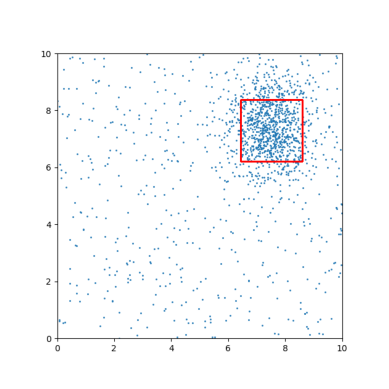

In [10]:
dibujar_rectangulo(image, darkest_rect, 100, 100)

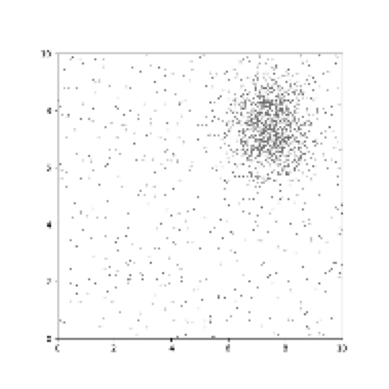

In [15]:

percent = 0.3

image = cv2.imread('data/image_1.png')
height, width = image.shape[:2]



grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

resized_image = cv2.resize(grayscale_image, (int(height * percent), int(width * percent)))
# print(int(height * percent))

rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)

f, ax = plt.subplots() #figsize=(6, 6)
ax.imshow(rgb_image)
ax.axis('off')
plt.show()

